# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Chandan Koiri
##### **Industry Name -** Codsoft

# **Project Summary -**

####**Description:**
The Iris Flower Classification project aims to build a model that can accurately identify the species of an iris flower based on its measurements. There are three species of iris flowers: Setosa, Versicolor, and Virginica. Each species has unique characteristics, such as differences in petal and sepal size. By analyzing these measurements, the model can determine the correct species, making the classification process more efficient and accurate.

####**Objective:**
The main goal of this project is to develop a model that can accurately identify the species of an iris flower based on its measurements. By using data patterns, the model helps automate the classification process, making it easier and more efficient to determine the correct species.


# **GitHub Link -**

https://github.com/Chandan2597/CODSOFT/tree/main/Task_3

# **Problem Statement**



#### **Introduction**  
The iris flower belongs to a unique group of flowering plants known as *Iris*. Among them, three main species—Setosa, Versicolor, and Virginica—are known for their distinct physical features. These species can be identified based on key measurements, such as the length and width of their petals and sepals.  

#### **Objective**  
This project aims to create a model that can accurately classify iris flowers into their respective species based on their measurements. By analyzing these characteristics, the model will automate the classification process, making it more efficient and reliable.  

#### **Project Overview**  
- **Iris Species:** The dataset includes three species—Setosa, Versicolor, and Virginica.  
- **Key Measurements:** The classification is based on four features—sepal length, sepal width, petal length, and petal width.  
- **Model Development:** A machine learning model will be trained to recognize patterns in these measurements and classify the flowers correctly.  

#### **Significance**  
This project simplifies the process of identifying iris species, which can be useful in areas like botany, horticulture, and environmental studies. By automating classification, it saves time and improves accuracy in species identification.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
# Loading Dataset
iris_df = pd.read_csv("https://raw.githubusercontent.com/Chandan2597/CODSOFT/main/Task_3/IRIS.csv")

### Dataset First View

In [3]:
# Dataset First Look
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Number of rows: ",iris_df.shape[0])
print("Number of columns: ",iris_df.shape[1])

Number of rows:  150
Number of columns:  5


### Dataset Information

In [5]:
# Dataset Info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate = iris_df.duplicated().sum()
print(f"Number of duplicated rows are {duplicate}")

Number of duplicated rows are 3


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


### What did you know about your dataset?

* The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
* There are 150 rows and 5 columns provided in the data.
* 3 duplicate values exist.
* No Null values exist.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
# Dataset Describe
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check Unique Values for each variable.

In [10]:
# Checking Unique Values for each variable.
for i in iris_df.columns:
  print(f"No. of unique values in",i,"is",iris_df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Dropping the duplicated rows in the dataset
iris_df.drop_duplicates(inplace=True)

In [12]:
# Updated dataset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### What all manipulations have I done?

Only dropped the duplicated rows in the dataset. The dataset is now ready for analysis, no further transformation is required.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Numerical Variables

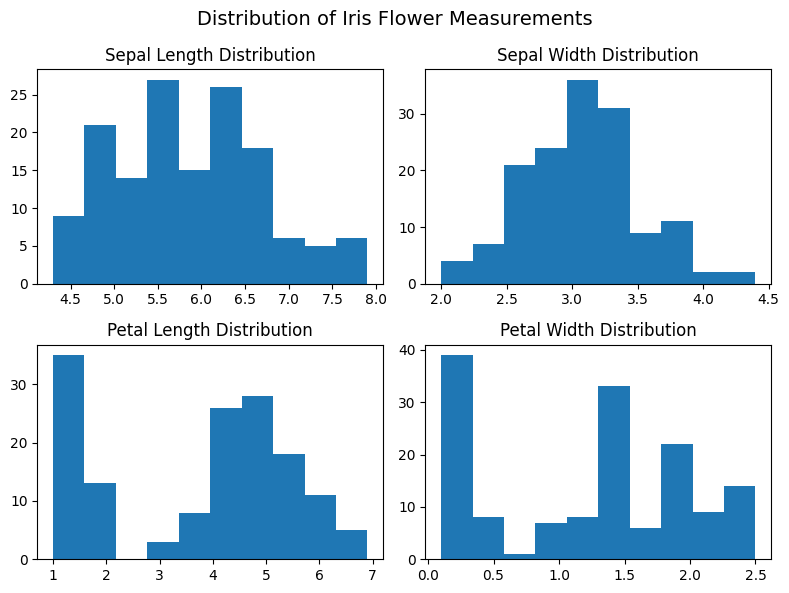

In [13]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Creating a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Creating a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(iris_df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(iris_df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(iris_df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(iris_df['petal_width'])
plt.title('Petal Width Distribution')

# Displaying the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

##### 1. What is/are the insight(s) found from the chart?

The chart shows the distribution of sepal and petal lengths and widths for Iris flowers. Key insights:

* **Sepal Length**: Bimodal distribution, peaking around 5.5 and 6.5 cm.
* **Sepal Width**: Unimodal, skewed right, peaking around 3 cm.
* **Petal Length**: Bimodal, peaking around 1.5 and 5 cm, suggesting two distinct groups.
* **Petal Width**: Bimodal, with a very high peak near 0.25 cm and another around 1.3 cm, indicating two distinct groups.

#### Chart - 2 Sepal length vs Sepal width

In [14]:
# Defining colors for each species and the corresponding species labels.
colors = ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

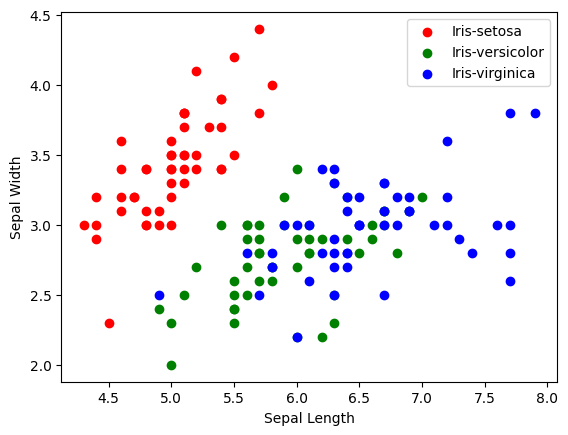

In [15]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Creating a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Selecting data for the current species.
    x = iris_df[iris_df['species'] == species[i]]

    # Creating a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Adding labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Adding a legend to identify species based on colors.
plt.legend()

# Displaying the scatter plot.
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* **Iris-setosa (red)** has shorter sepal lengths and wider sepal widths compared to the other two species.
* **Iris-versicolor (green)** and **Iris-virginica (blue)** have overlapping sepal length and width ranges, but Iris-virginica tends to have longer and wider sepals on average.
* **Iris-setosa** is clearly separable based on sepal dimensions, while distinguishing between Iris-versicolor and Iris-virginica might require additional features.

#### Chart - 3 Petal Length vs Petal Width

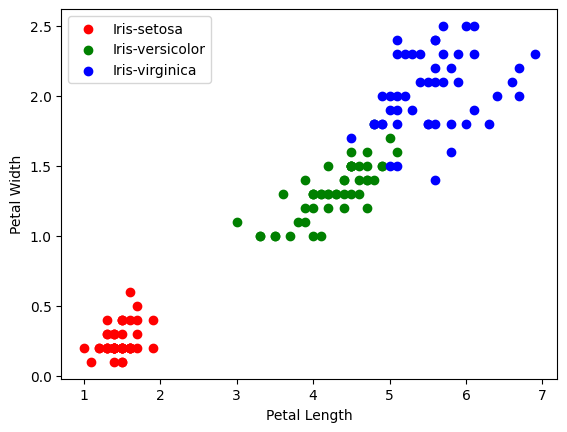

In [16]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Creating a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Selecting data for the current species.
    x = iris_df[iris_df['species'] == species[i]]

    # Creating a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Adding labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Adding a legend to identify species based on colors.
plt.legend()

# Displaying the scatter plot.
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* **Iris-setosa** (red) has significantly smaller petal lengths and widths, forming a distinct cluster.
* **Iris-versicolor** (green) and **Iris-virginica** (blue) have larger petal dimensions and overlap somewhat, but Iris-virginica generally has larger petals.
* Petal dimensions are effective for separating the species, with Iris-setosa being easily distinguishable.

#### Chart - 4 Sepal Length vs Petal Length

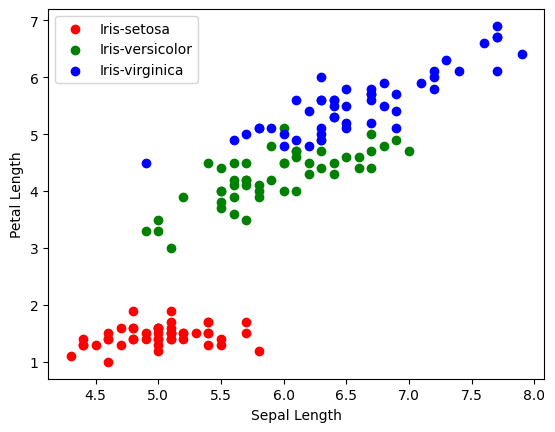

In [17]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Creating a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Selecting data for the current species.
    x = iris_df[iris_df['species'] == species[i]]

    # Creating a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Adding labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Adding a legend to identify species based on colors.
plt.legend()

# Displaying the scatter plot.
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Iris-setosa (red) has the smallest petal and sepal lengths, forming a distinct cluster.
* Iris-versicolor (green) and Iris-virginica (blue) have larger petal and sepal lengths, with Iris-virginica showing the largest values.
* There is some overlap between Iris-versicolor and Iris-virginica, but they can be reasonably distinguished using these two features.
* Sepal length is a good indicator for distinguishing Iris-setosa from the other two species.

#### Chart - 5

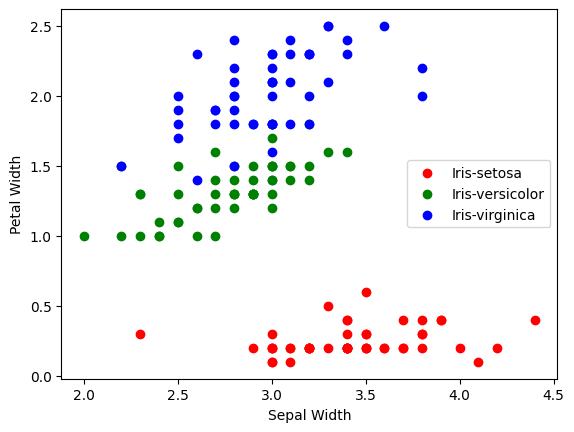

In [18]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Creating a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = iris_df[iris_df['species'] == species[i]]

    # Creating a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Adding labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Adding a legend to identify species based on colors.
plt.legend()

# Displaying the scatter plot.
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Iris-setosa (red) has the smallest petal width and a relatively narrow range of sepal widths.
* Iris-versicolor (green) has intermediate petal and sepal widths.
* Iris-virginica (blue) has the largest petal and sepal widths.
* Sepal width helps separate Iris-setosa from the other two species, but there's overlap between Iris-versicolor and Iris-virginica.
* Petal width is a strong discriminator, especially for Iris-setosa.

#### Chart - 14 - Correlation Heatmap

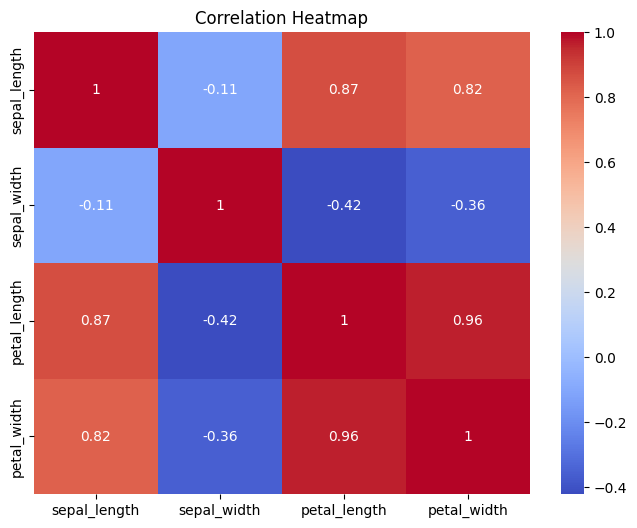

In [19]:
# Correlation Heatmap visualization code
# Plotting Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Setting Label
plt.title('Correlation Heatmap')

# Displaying chart
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Strong positive correlation: Petal length and petal width have a very strong positive correlation (0.96). Sepal length is also strongly positively correlated with both petal length (0.87) and petal width (0.82).
* Weak negative correlation: Sepal width has a weak negative correlation with sepal length (-0.11), petal length (-0.42), and petal width (-0.36).

In essence, petal dimensions are highly related, and sepal length is a good predictor of petal dimensions. Sepal width, however, has little to no positive correlation with other features.

#### Chart - 15 - Pair Plot

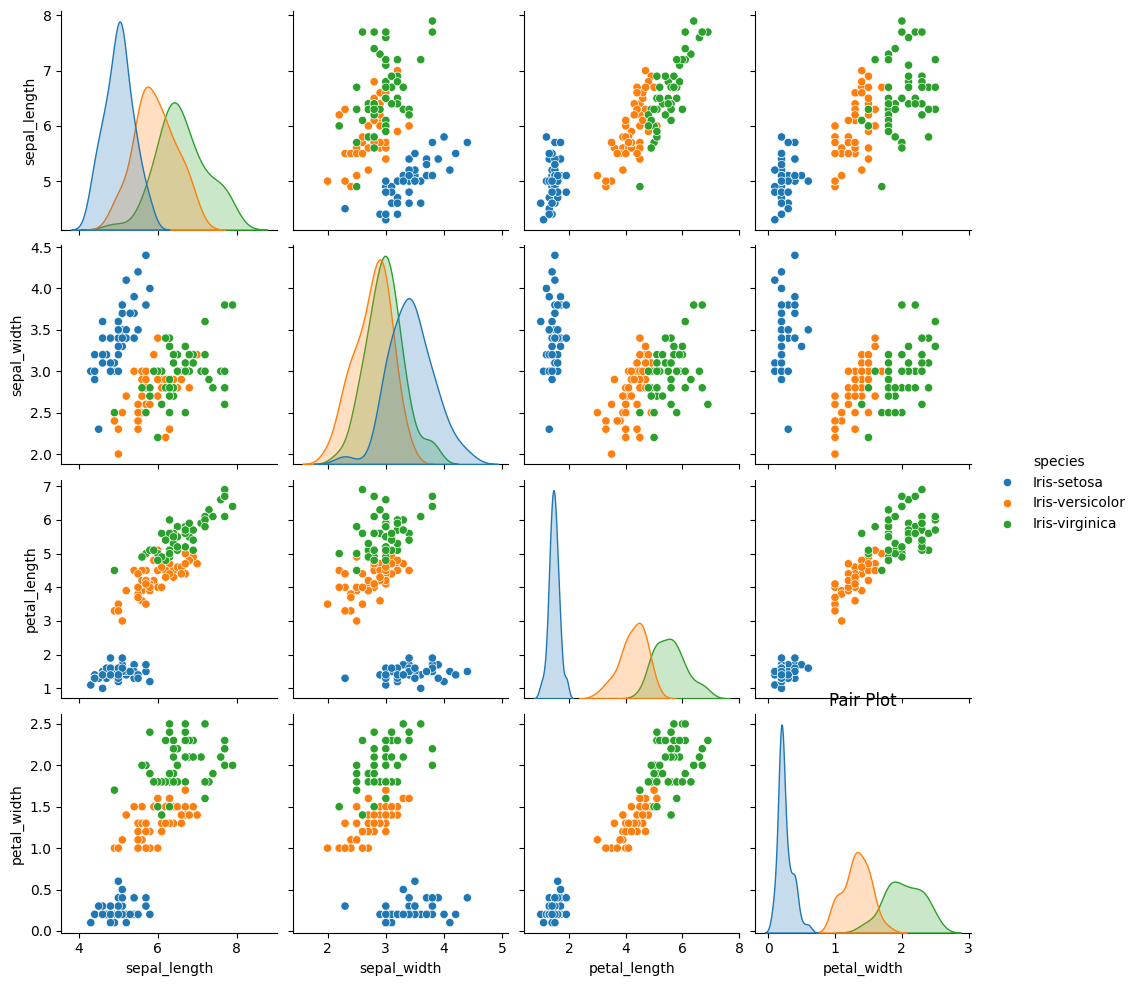

In [20]:
# Pair Plot visualization code
# Plotting pairplot
sns.pairplot(iris_df, hue='species')

# Setting label
plt.title('Pair Plot')

# Displaying chart
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Iris-setosa (blue) is well-separated from the other two species across all feature combinations, particularly by petal length and width.
* Iris-versicolor (orange) and Iris-virginica (green) show some overlap, but can be distinguished to some extent based on petal dimensions and sepal length.
* Petal length and width are highly correlated and are strong discriminators for species.
* Sepal length also contributes to species separation, particularly for Iris-setosa.
* Sepal width shows less distinct separation between species.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [21]:
# Handling Outliers & Outlier treatments
iris_df.describe([0.25,0.50,0.75,0.95,0.99])

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
95%,7.270000,3.800000,6.100000,2.300000
99%,7.700000,4.154000,6.700000,2.500000
max,7.900000,4.400000,6.900000,2.500000


##### What all outlier treatment techniques have you used and why did you use those techniques?

* The above description chart indicates that there are no outliers in the dataset.

### 2. Categorical Encoding

In [22]:
# Encoding the categorical columns
# Creating a LabelEncoder object
le = LabelEncoder()

# Encoding the 'species' column to convert the species names to numerical labels
iris_df['species'] = le.fit_transform(iris_df['species'])

# Checking the unique values in the 'Species' column after encoding
unique_species = iris_df['species'].unique()

# Displaying the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2


Encoded Species Values:
[0 1 2]


#### What all categorical encoding techniques have you used & why did you use those techniques?

* I have used LabelEncoder to encode the Categorical column to Numerical values.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [23]:
# Defining the X and y
x=iris_df.drop(columns=['species'], axis=1)
y=iris_df['species']

### 2. Data Splitting

In [24]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [25]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
species,
2,36
0,33
1,33


## ***6. ML Model Implementation***

In [26]:
# Creating a function to evaluate model
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fitting the model to the training data.
    model.fit(x_train, y_train)

    # Making predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculating confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculating classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [27]:
# Creating a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


### ML Model - 1 Logistic Regression

In [38]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


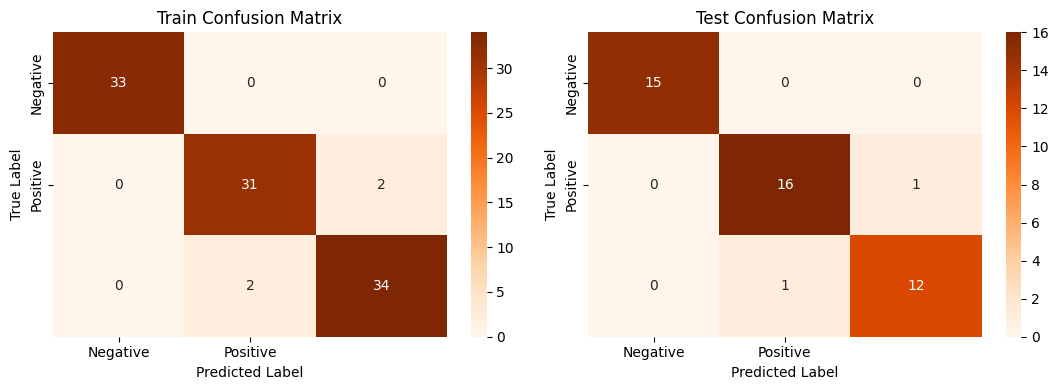


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.939394 | 0.939394 |   0.939394 |  33        |
| 2            |    0.944444 | 0.944444 |   0.944444 |  36        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.961279 | 0.961279 |   0.961279 | 102        |
| weighted avg |    0.960784 | 0.960784 |   0.960784 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [39]:
# Visualizing evaluation metrics score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [40]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.960784
Precision Test,0.955556
Recall Train,0.960784
Recall Test,0.955556
Accuracy Train,0.960784
Accuracy Test,0.955556
F1 macro Train,0.960784
F1 macro Test,0.955556


#### 2. Cross- Validation & Hyperparameter Tuning

In [41]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [42]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


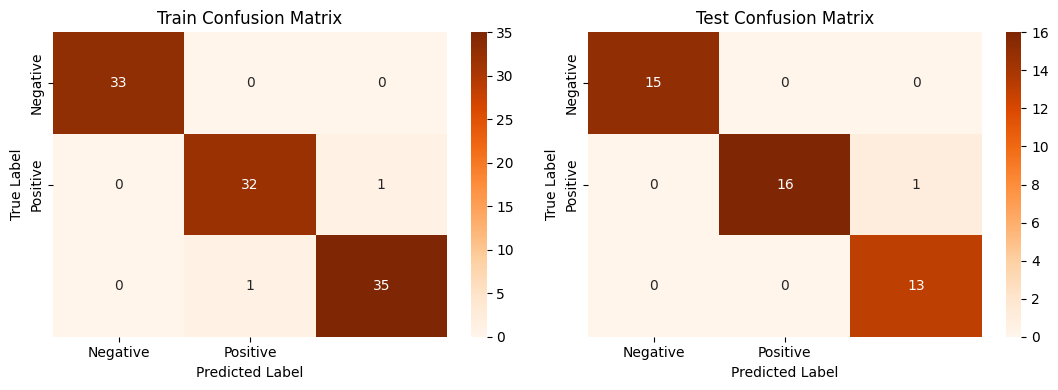


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.969697 | 0.969697 |   0.969697 |  33        |
| 2            |    0.972222 | 0.972222 |   0.972222 |  36        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.98064  | 0.98064  |   0.98064  | 102        |
| weighted avg |    0.980392 | 0.980392 |   0.980392 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.941176 |   0.969697 | 17        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [43]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [45]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have you used and why?

The model's hyperparameters were optimized using GridSearchCV, a technique that systematically tests different combinations of parameter values to find the best settings. This method is widely used because it is easy to apply and can effectively improve model performance.  

The choice of an optimization method depends on factors like the number of parameters to test, available computing power, and time constraints. GridSearchCV works well when there are only a few parameters to tune and when computational resources are sufficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [46]:
# Updated Evaluation metric score chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.960784,0.980392
Precision Test,0.955556,0.979365
Recall Train,0.960784,0.980392
Recall Test,0.955556,0.977778
Accuracy Train,0.960784,0.980392
Accuracy Test,0.955556,0.977778
F1 macro Train,0.960784,0.980392
F1 macro Test,0.955556,0.977853


Yes, there is an improvement after tuning the logistic regression model. All evaluation metrics (Precision, Recall, Accuracy, and F1-score) have increased slightly in both training and testing, with the most notable improvement in Precision and Accuracy on the test set.

### ML Model - 2

In [47]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


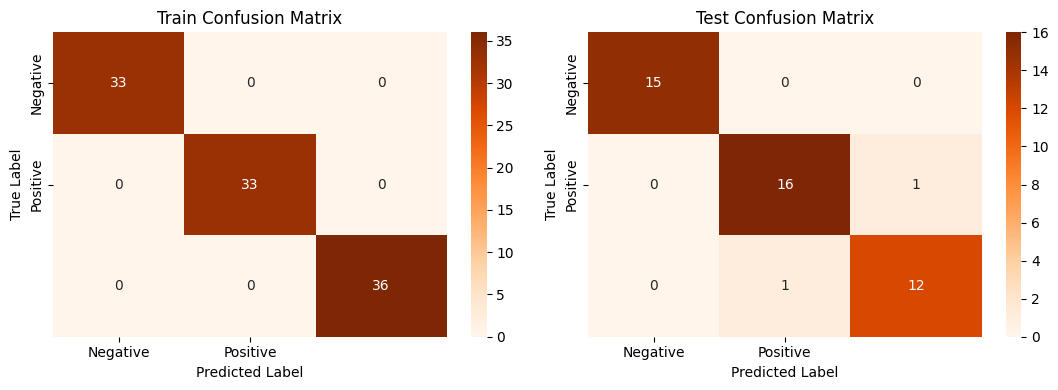


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [48]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [49]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.960784,0.980392,1.000000
Precision Test,0.955556,0.979365,0.955556
Recall Train,0.960784,0.980392,1.000000
Recall Test,0.955556,0.977778,0.955556
Accuracy Train,0.960784,0.980392,1.000000
Accuracy Test,0.955556,0.977778,0.955556
F1 macro Train,0.960784,0.980392,1.000000
F1 macro Test,0.955556,0.977853,0.955556


#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


In [51]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


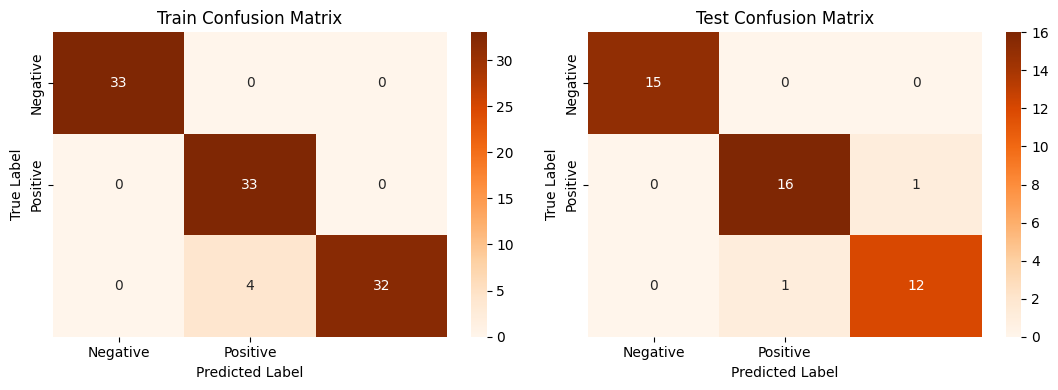


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.891892 | 1        |   0.942857 |  33        |
| 2            |    1        | 0.888889 |   0.941176 |  36        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.963964 | 0.962963 |   0.961345 | 102        |
| weighted avg |    0.965024 | 0.960784 |   0.960751 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [52]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [53]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have you used and why?

The model's hyperparameters were optimized using GridSearchCV, a technique that systematically tests different combinations of parameter values to find the best settings. This method is widely used because it is easy to apply and can effectively improve model performance.

The choice of an optimization method depends on factors like the number of parameters to test, available computing power, and time constraints. GridSearchCV works well when there are only a few parameters to tune and when computational resources are sufficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [54]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.960784,0.980392,1.000000,0.965024
Precision Test,0.955556,0.979365,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784
Recall Test,0.955556,0.977778,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784
Accuracy Test,0.955556,0.977778,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751
F1 macro Test,0.955556,0.977853,0.955556,0.955556


Hyperparameter tuning did not improve the performance of the Decision Tree model on the test set. The tuned model has lower precision, recall, accuracy, and F1 scores compared to the untuned version.  

However, the tuned model is less prone to overfitting, unlike the untuned model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Random Forest Classifier


In [55]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


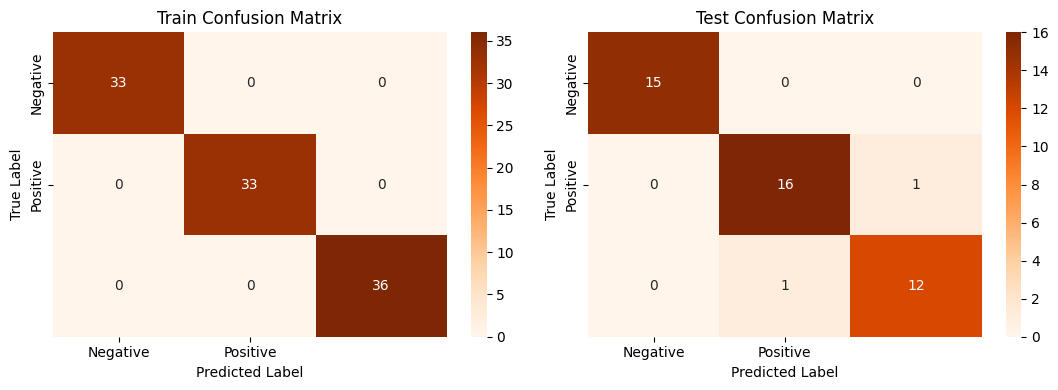


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [56]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [57]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 10}


In [59]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


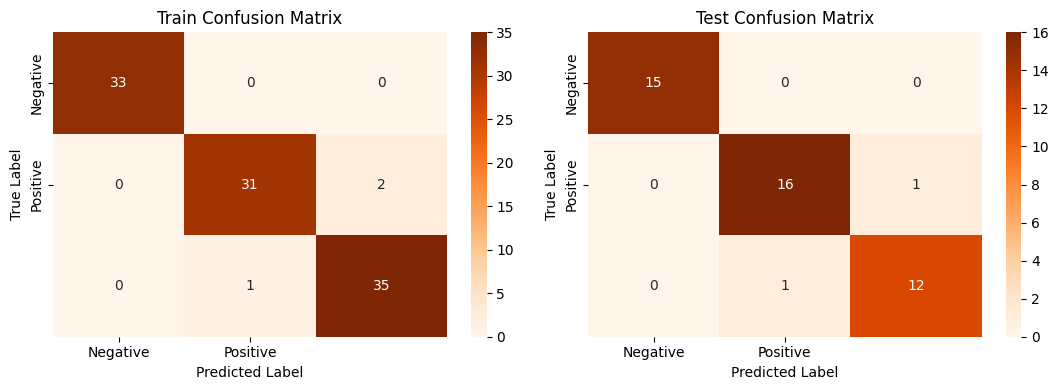


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.96875  | 0.939394 |   0.953846 |  33        |
| 2            |    0.945946 | 0.972222 |   0.958904 |  36        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.971565 | 0.970539 |   0.970917 | 102        |
| weighted avg |    0.970812 | 0.970588 |   0.970563 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [60]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [61]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have you used and why?

The model's hyperparameters were optimized using GridSearchCV, a technique that systematically tests different combinations of parameter values to find the best settings. This method is widely used because it is easy to apply and can effectively improve model performance.  

The choice of an optimization method depends on factors like the number of parameters to test, available computing power, and time constraints. GridSearchCV works well when there are only a few parameters to tune and when computational resources are sufficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [62]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556


Hyperparameter tuning improved the Random Forest model's performance on the training set. However, the precision, recall, accuracy, and F1 scores on the test set remained unchanged for both the tuned and untuned models.

### ML Model - 4 SVM(Support Vector Machine)

In [63]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


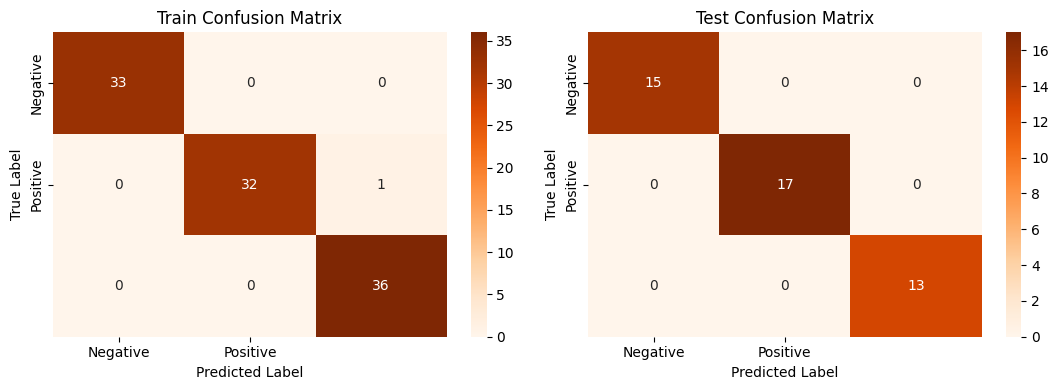


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.969697 |   0.984615 |  33        |
| 2            |    0.972973 | 1        |   0.986301 |  36        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.990991 | 0.989899 |   0.990306 | 102        |
| weighted avg |    0.990461 | 0.990196 |   0.990188 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [64]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [65]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000


#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': np.int64(4), 'C': np.float64(1.6)}


In [67]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


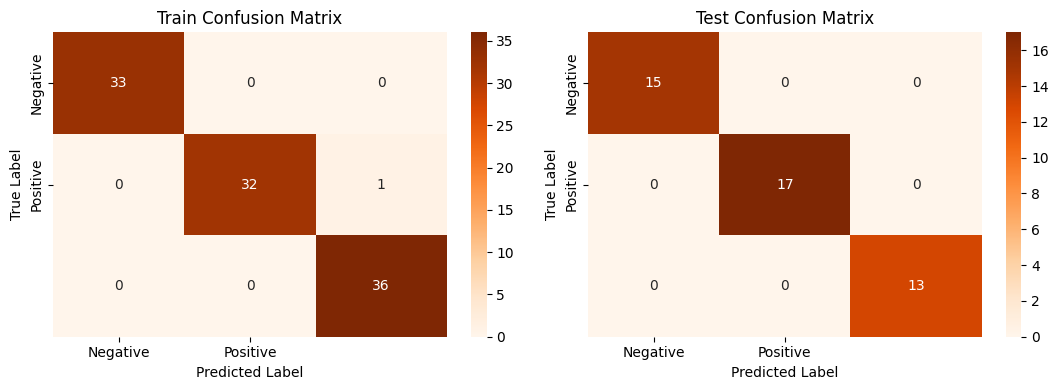


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.969697 |   0.984615 |  33        |
| 2            |    0.972973 | 1        |   0.986301 |  36        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.990991 | 0.989899 |   0.990306 | 102        |
| weighted avg |    0.990461 | 0.990196 |   0.990188 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [68]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [69]:
score['SVM tuned'] = svm2_score

##### Which hyperparameter optimization technique have you used and why?

Here Randomized search was used to fine-tune the model’s hyperparameters. Unlike methods that test all possible combinations, it selects a random set of values to try. This approach is often faster and requires fewer computing resources while still finding good parameter settings for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [70]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000


Hyperparameter tuning did not improve the performance of the SVM model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned SVM models.

### ML Model - 5 Xtreme Gradient Boosting

In [71]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


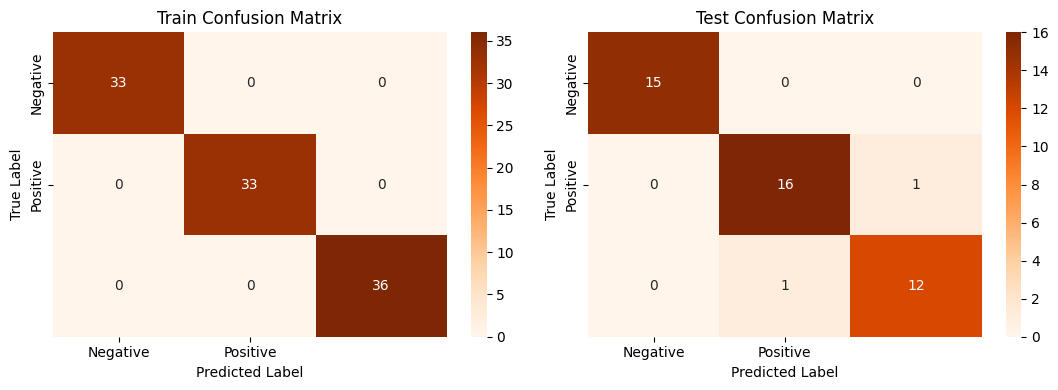


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [72]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [73]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(130), 'max_depth': np.int64(6), 'learning_rate': np.float64(0.060000000000000005)}


In [75]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


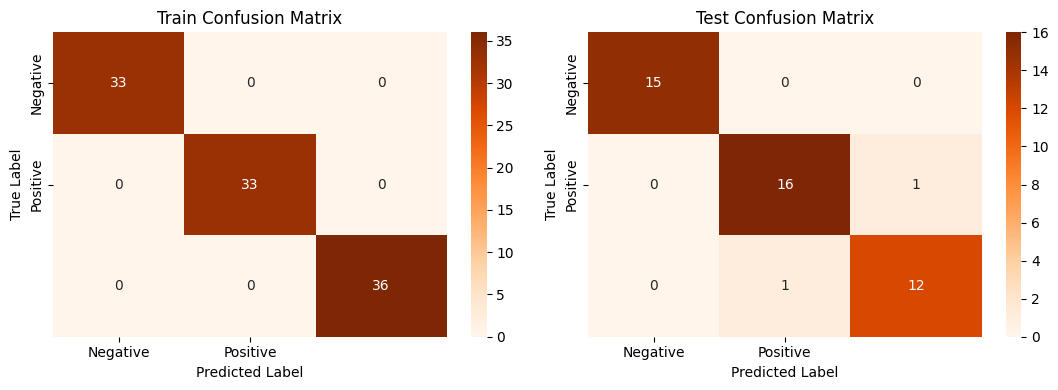


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [76]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [77]:
score['XGB tuned'] = xgb2_score

##### Which hyperparameter optimization technique have you used and why?

Here Randomized search was used to fine-tune the model’s hyperparameters. Unlike methods that test all possible combinations, it selects a random set of values to try. This approach is often faster and requires fewer computing resources while still finding good parameter settings for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [78]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000,1.000000
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000,1.000000
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556


Hyperparameter tuning did not improve the performance of the XGBoost model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both the untuned and tuned XGBoost models.

### ML Model - 6 Naive Bayes

In [93]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


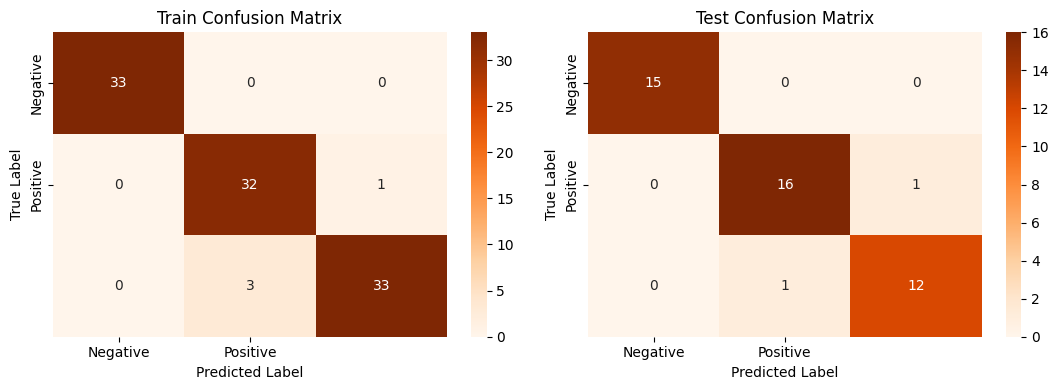


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.914286 | 0.969697 |   0.941176 |  33        |
| 2            |    0.970588 | 0.916667 |   0.942857 |  36        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.961625 | 0.962121 |   0.961345 | 102        |
| weighted avg |    0.961888 | 0.960784 |   0.960801 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [94]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [95]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000,1.000000,0.961888
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000,1.000000,0.960801
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556


#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.002848035868435802)}


In [97]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


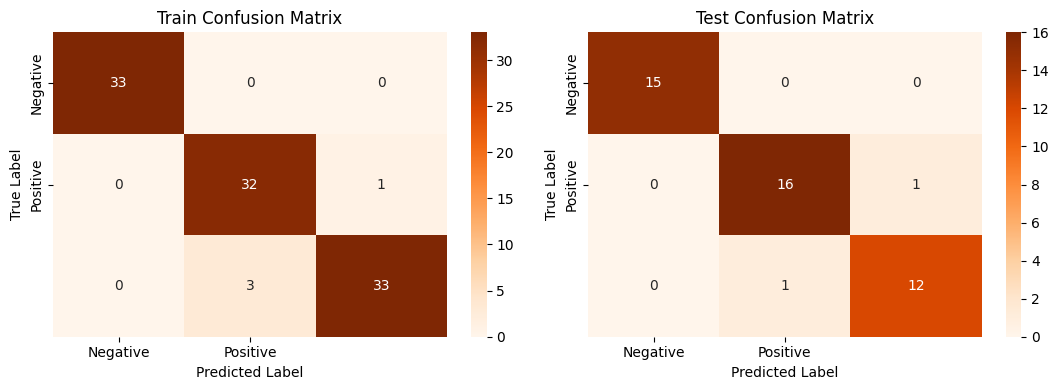


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.914286 | 0.969697 |   0.941176 |  33        |
| 2            |    0.970588 | 0.916667 |   0.942857 |  36        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.961625 | 0.962121 |   0.961345 | 102        |
| weighted avg |    0.961888 | 0.960784 |   0.960801 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.923077 | 0.923077 |   0.923077 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [98]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [99]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV to optimize the Naive Bayes model by testing all possible combinations of specified hyperparameters. This method works well when there are only a few parameters to tune and the range of values is limited. While it helps find the best settings, it can be time-consuming for larger parameter grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [100]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000,1.000000,0.961888,0.961888
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000,1.000000,0.960801,0.960801
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556


From the above chart it appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has precision, recall, accuracy and F1 score on the test set as same as in the untuned Naive Bayes model.

### ML Model - 7 Neural Network

In [101]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model function

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


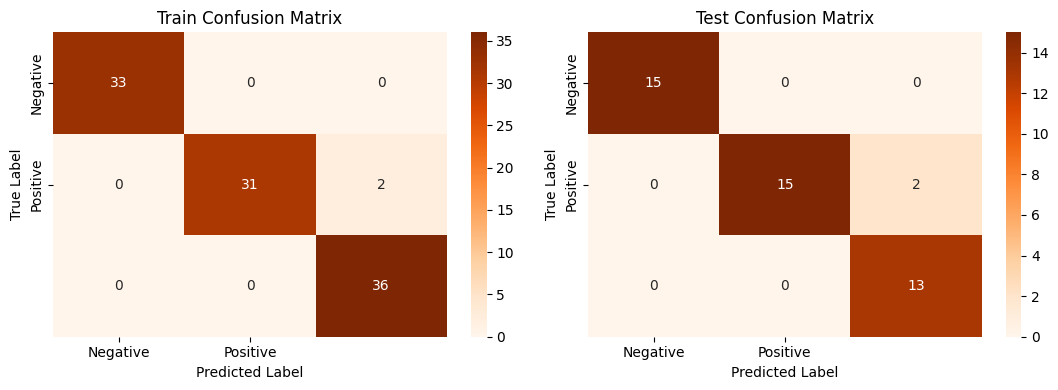


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.939394 |   0.96875  |  33        |
| 2            |    0.947368 | 1        |   0.972973 |  36        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.982456 | 0.979798 |   0.980574 | 102        |
| weighted avg |    0.981424 | 0.980392 |   0.980351 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.882353 |   0.9375   | 17        |
| 2            |    0.866667 | 1        |   0.928571 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [102]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [103]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000,1.000000,0.961888,0.961888,0.981424
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.961481
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784,0.980392
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784,0.980392
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000,1.000000,0.960801,0.960801,0.980351
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955754


#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(70), 'alpha': np.float64(0.0007000000000000001)}


In [105]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


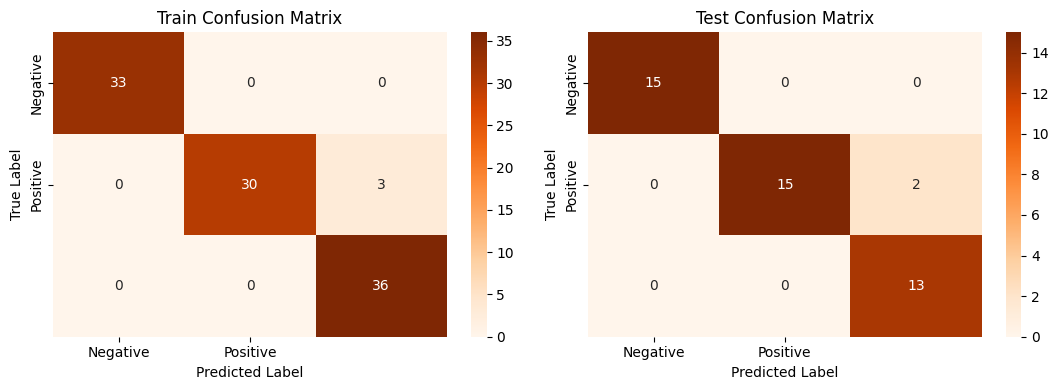


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 102        |
| weighted avg |    0.972851 | 0.970588 |   0.970476 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.882353 |   0.9375   | 17        |
| 2            |    0.866667 | 1        |   0.928571 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [106]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [107]:
score['Neural Network tuned']= neural2_score

##### Which hyperparameter optimization technique have you used and why?

Here Randomized search was used to fine-tune the model’s hyperparameters. Unlike methods that test all possible combinations, it selects a random set of values to try. This approach is often faster and requires fewer computing resources while still finding good parameter settings for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [108]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.960784,0.980392,1.000000,0.965024,1.000000,0.970812,0.990461,0.990461,1.000000,1.000000,0.961888,0.961888,0.981424,0.972851
Precision Test,0.955556,0.979365,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.961481,0.961481
Recall Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784,0.980392,0.970588
Recall Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.960784,0.980392,1.000000,0.960784,1.000000,0.970588,0.990196,0.990196,1.000000,1.000000,0.960784,0.960784,0.980392,0.970588
Accuracy Test,0.955556,0.977778,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.960784,0.980392,1.000000,0.960751,1.000000,0.970563,0.990188,0.990188,1.000000,1.000000,0.960801,0.960801,0.980351,0.970476
F1 macro Test,0.955556,0.977853,0.955556,0.955556,0.955556,0.955556,1.000000,1.000000,0.955556,0.955556,0.955556,0.955556,0.955754,0.955754


The tuned Neural Network model slightly reduced overfitting by lowering train set scores, making it more generalized.

However, the test set performance remains unchanged, indicating that tuning did not significantly improve generalization.

In [109]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.960784 |                    0.980392 |        1        |              0.965024 |        1        |              0.970812 | 0.990461 |    0.990461 | 1        |    1        |      0.961888 |            0.961888 |         0.981424 |               0.972851 |
| Precision Test  |              0.955556 |                    0.979365 |        0.955556 |              0.955556 |        0.95555

##**Selection of Best Model**

In [110]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.960784,0.955556,0.960784,0.955556,0.960784,0.955556,0.960784,0.955556
Decision Tree tuned,0.965024,0.955556,0.960784,0.955556,0.960784,0.955556,0.960751,0.955556
Random Forest tuned,0.970812,0.955556,0.970588,0.955556,0.970588,0.955556,0.970563,0.955556
Naive Bayes,0.961888,0.955556,0.960784,0.955556,0.960784,0.955556,0.960801,0.955556
Naive Bayes tuned,0.961888,0.955556,0.960784,0.955556,0.960784,0.955556,0.960801,0.955556
Neural Network tuned,0.972851,0.961481,0.970588,0.955556,0.970588,0.955556,0.970476,0.955754


In [111]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [112]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Neural Network tuned - 0.9615
Recall: Logistic regression - 0.9556
Accuracy: Logistic regression - 0.9556
F1 macro: Neural Network tuned - 0.9558


In [113]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.960784 |      0.955556 |
| Decision Tree tuned    |       0.960784 |      0.955556 |
| Random Forest tuned    |       0.970588 |      0.955556 |
| Naive Bayes            |       0.960784 |      0.955556 |
| Naive Bayes tuned      |       0.960784 |      0.955556 |
| Neural Network tuned   |       0.970588 |      0.955556 |


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After considering the impact of false positives and false negatives on our business goals, I have chosen recall as the main evaluation metric for our Iris flower classification model. Our goal is to correctly identify as many Iris flowers as possible while minimizing missed identifications. Even if this leads to a few incorrect classifications, it ensures we capture the maximum number of true Iris flowers.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After testing multiple machine learning models on the Iris dataset, I chose the tuned Random Forest as our final model. This decision is based on its strong performance in recall, which measures how well the model identifies different Iris flowers. Among all the models we evaluated, the tuned Random Forest had the highest recall score.  

I prioritized recall because correctly identifying Iris flowers is essential for our business goals. A higher recall ensures we classify as many Iris flowers as possible, even if it means a few incorrect classifications. Overall, the tuned Random Forest is the best fit for our needs and will help us achieve a positive impact.

In [114]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [116]:

# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.2, 3.3, 2.4, 1.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [117]:
# Save the File
import joblib
joblib.dump(rf_model2, 'rf_model2.pkl')

['rf_model2.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [118]:
# Load the File and predict unseen data.
loaded_model = joblib.load('rf_model2.pkl')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


In this project, we aimed to classify Iris flowers into three species: **Iris-Setosa, Iris-Versicolor, and Iris-Virginica**. After thorough analysis and testing, we selected the **tuned Random Forest model** as the final prediction model.  

### **Key Findings:**  

- **Data Exploration:** We analyzed the dataset to understand feature distributions and found that **Iris-Setosa** had distinct characteristics compared to the other species.  
- **Data Preprocessing:** Steps like handling missing values and encoding categorical data were performed to prepare the dataset for modeling.  
- **Model Selection:** We tested different machine learning models and chose **tuned Random Forest** for its accuracy, reliability, and ability to classify Iris species effectively.  
- **Model Training & Evaluation:** The model was trained and tested using key performance metrics, showing strong accuracy and precision in classification.  
- **Challenges & Future Work:** Some challenges included feature selection and model fine-tuning. Future improvements may involve exploring advanced techniques to enhance accuracy.  
- **Practical Application:** This model can help **botanists and horticulturists** automate the identification of Iris species based on physical traits.  

### **Conclusion:**  

The **tuned Random Forest model** successfully classified Iris flowers with high accuracy. The results provide valuable insights into species differentiation and have practical applications in botany. Future refinements could further improve model performance, making classification even more precise and reliable.